In [ ]:
# PREPARE DATASET

In [45]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [62]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [47]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
      "PlantVillage",
       shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [48]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [49]:
len(dataset)

68

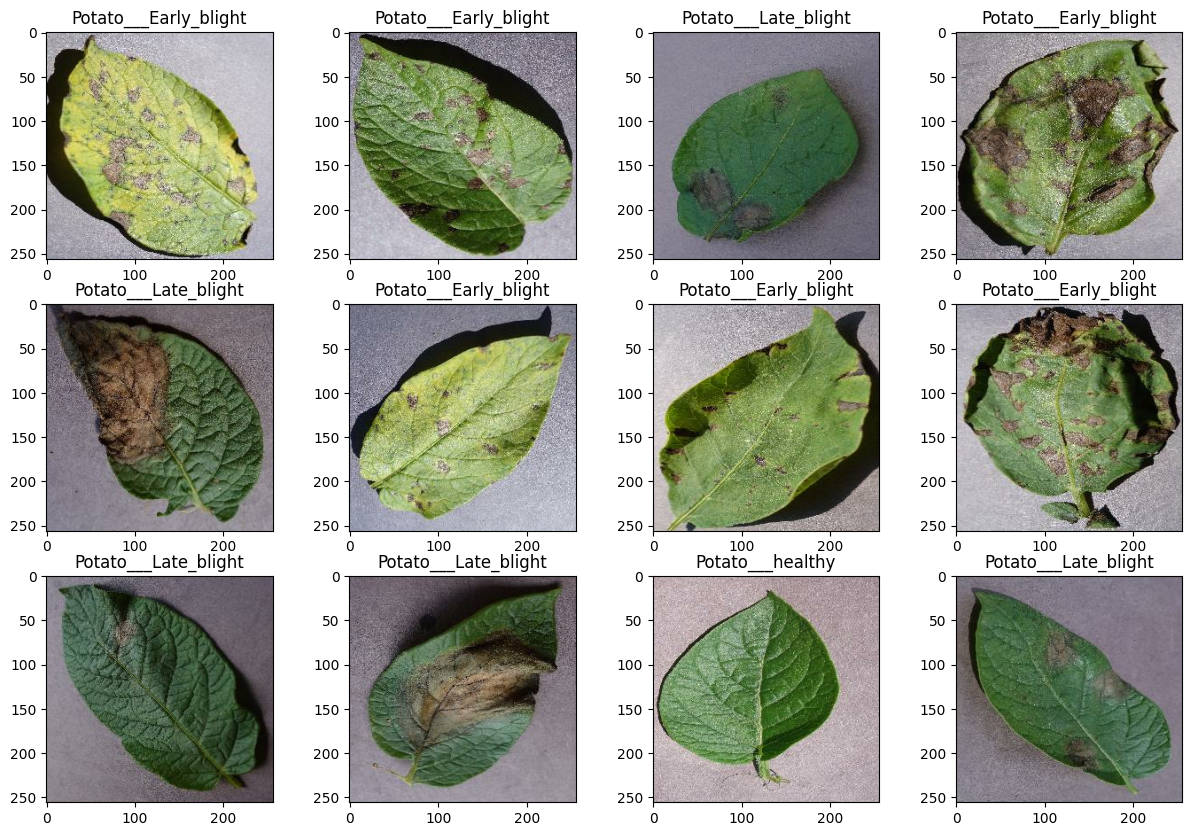

In [61]:
plt.figure(figsize = (15,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
    
    
    
   # plt.axis("off")
   # print(image_batch.shape)
   # print(label_batch.numpy())

In [75]:
def divide_dataset(ds, train_split = 0.8, test_split = 0.1, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed =1)
    
    train_size = int(train_split * ds_size)
    val_size =   int(val_split * ds_size)
    
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    
    
    
    return train_ds, val_ds, test_ds

In [76]:
train_ds, val_ds, test_ds = divide_dataset(dataset)

In [77]:
len(train_ds)

54

In [78]:
len(test_ds)

8

In [79]:
len(val_ds)

6

In [82]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [84]:
ressize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)    
])

In [85]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)    
])

In [ ]:
# BUILD THE MODEL

In [88]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    ressize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (input_shape, input_shape)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])

model.build(input_shape = input_shape)

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [90]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']

)

In [98]:
history = model.fit(
    
    train_ds,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,
    
)

Epoch 1/50
54/54 [==============================] - 75s 1s/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.1478 - val_accuracy: 0.9583
Epoch 2/50
54/54 [==============================] - 75s 1s/step - loss: 0.0256 - accuracy: 0.9907 - val_loss: 0.0381 - val_accuracy: 0.9896
Epoch 3/50
54/54 [==============================] - 76s 1s/step - loss: 0.0145 - accuracy: 0.9948 - val_loss: 0.0492 - val_accuracy: 0.9792
Epoch 4/50
54/54 [==============================] - 78s 1s/step - loss: 0.0174 - accuracy: 0.9925 - val_loss: 0.3472 - val_accuracy: 0.9167
Epoch 5/50
54/54 [==============================] - 77s 1s/step - loss: 0.0261 - accuracy: 0.9890 - val_loss: 0.0143 - val_accuracy: 0.9948
Epoch 6/50
54/54 [==============================] - 78s 1s/step - loss: 0.0548 - accuracy: 0.9792 - val_loss: 0.0458 - val_accuracy: 0.9740
Epoch 7/50
54/54 [==============================] - 79s 1s/step - loss: 0.0619 - accuracy: 0.9792 - val_loss: 0.0633 - val_accuracy: 0.9635
Epoch 8/50
54/54 [==

In [99]:
score = model.evaluate(test_ds)

8/8 [==============================] - 2s 317ms/step - loss: 0.2144 - accuracy: 0.9492


In [100]:
score

[0.21436156332492828, 0.94921875]

In [102]:
history

In [103]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

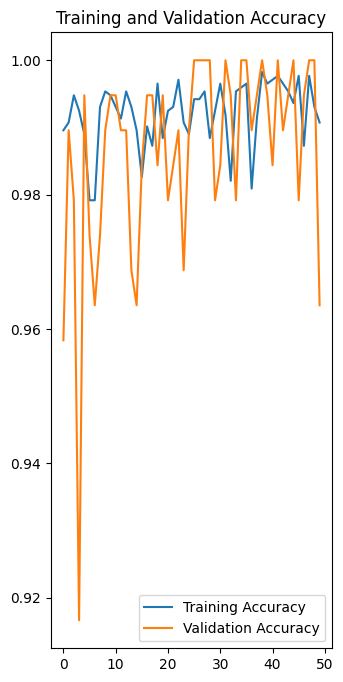

In [106]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

In [110]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


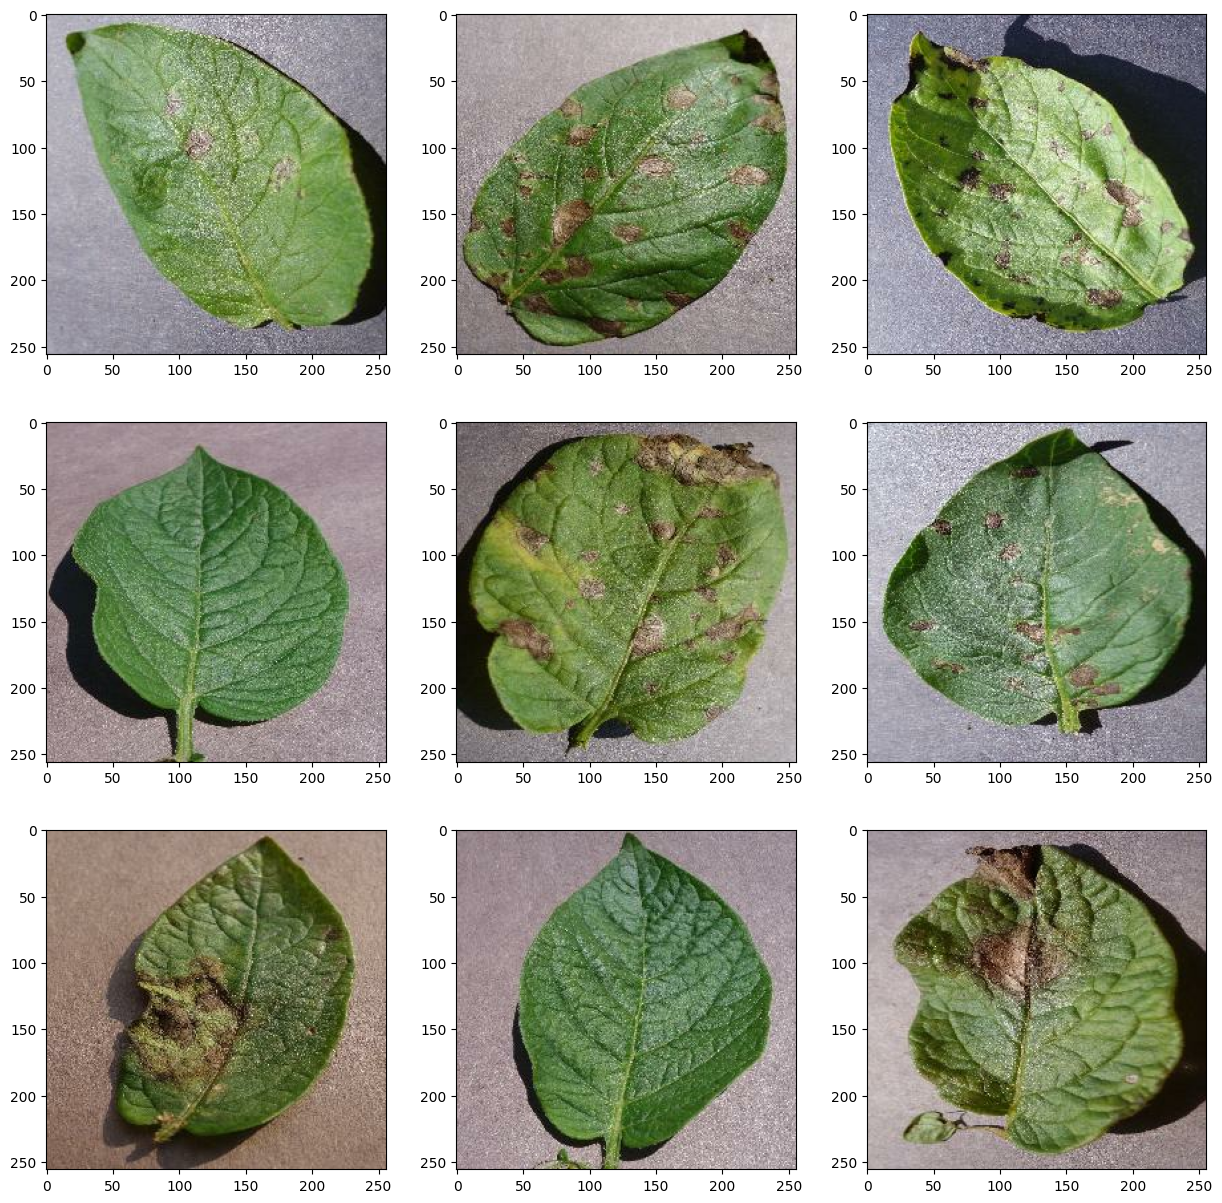

In [112]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
       

1/1 [==============================] - 0s 35ms/step


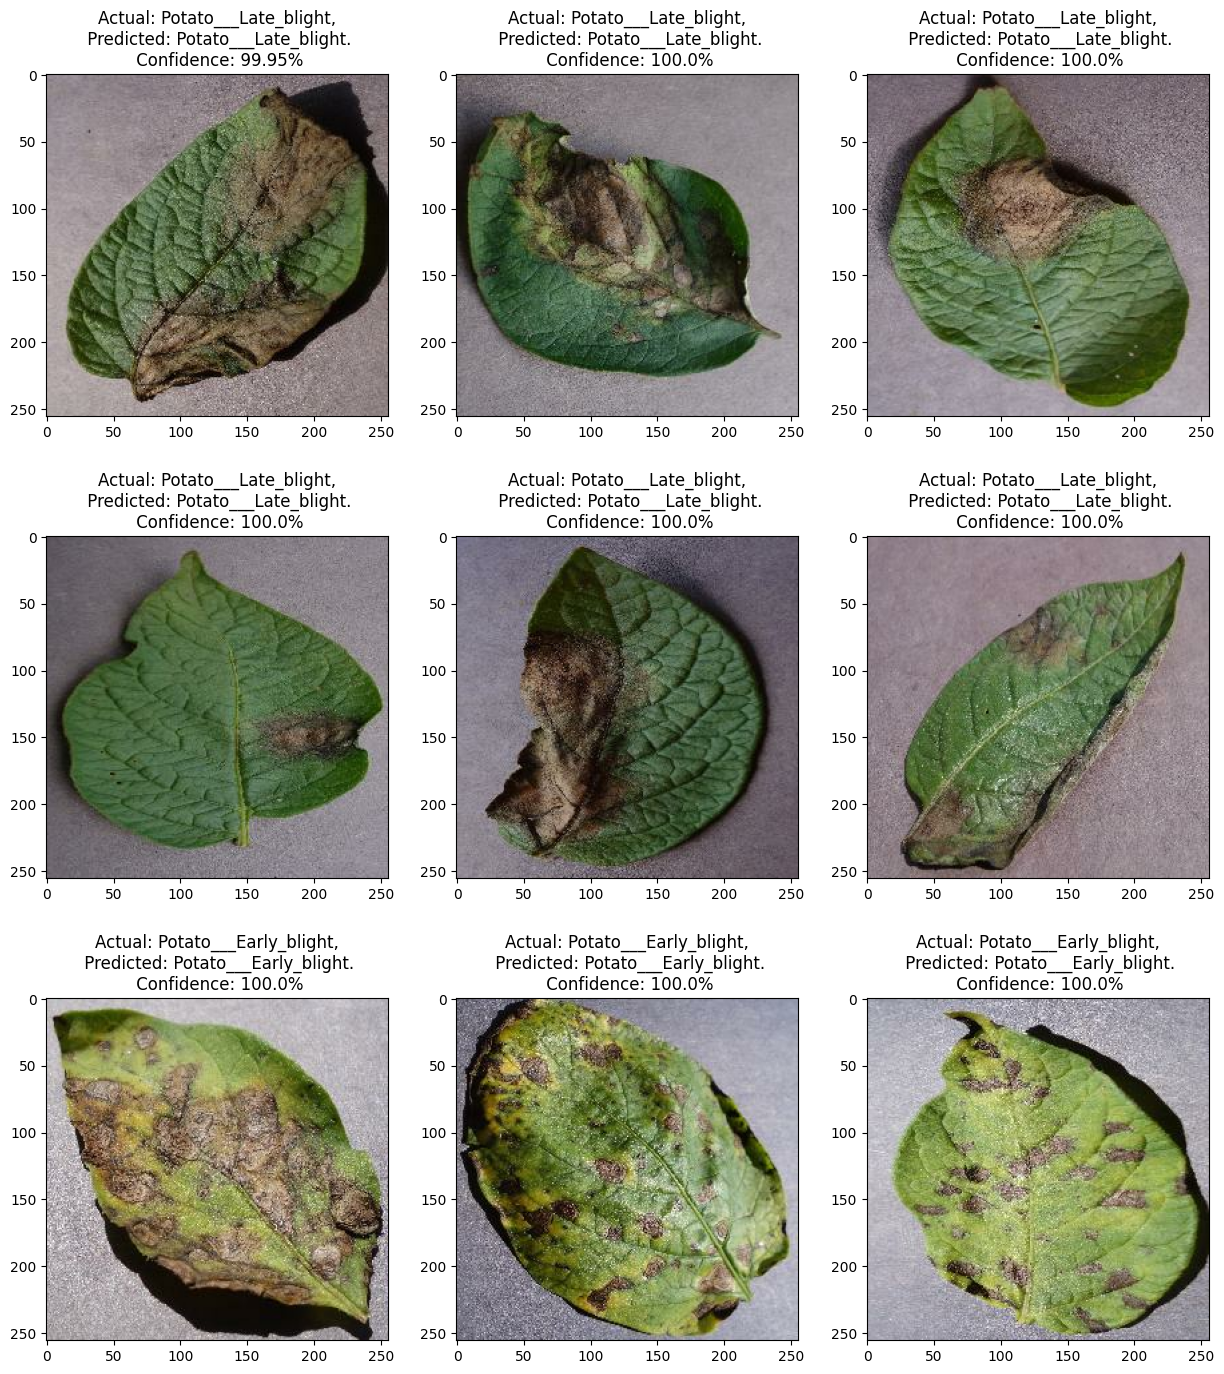

In [117]:
plt.figure(figsize=(15, 17))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        

In [120]:
model_version = 1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets
